<a href="https://colab.research.google.com/github/Vietgibhub/random_forest/blob/main/Random_forest_with_CRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**new codes**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
from google.colab import data_table
table = data_table.DataTable(X)
table

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
import numpy as np

dataset = X.index
alpha = 0.8

tables = {0:[np.random.choice(dataset)]}
num_sample = 150
for _ in range(num_sample):
    probabilities = []
    
    for table, data_points in tables.items():
        table_size = len(data_points)
        probabilities.append(table_size)
    
    probabilities.append(alpha)
    probabilities = [prob/sum(probabilities) for prob in probabilities]
    
    table_index = np.random.choice(range(len(probabilities)), p=probabilities)
    
    if table_index == len(tables):
        last_table = list(tables.keys())[-1]
        tables[last_table+1] = [np.random.choice(dataset)]
    else:
        tables[table_index].append(np.random.choice(dataset))


import itertools
people = tables.values()
flat_list = list(itertools.chain.from_iterable(people))

resampled_X = X.loc[flat_list]
resampled_y = y.loc[resampled_X.index]
from google.colab import data_table
table = data_table.DataTable(resampled_X)
table

,0,1,2,3
82,5.8,2.7,3.9,1.2
127,6.1,3.0,4.9,1.8
61,5.9,3.0,4.2,1.5
145,6.7,3.0,5.2,2.3
128,6.4,2.8,5.6,2.1
...,...,...,...,...
138,6.0,3.0,4.8,1.8
143,6.8,3.2,5.9,2.3
120,6.9,3.2,5.7,2.3
87,6.3,2.3,4.4,1.3


<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

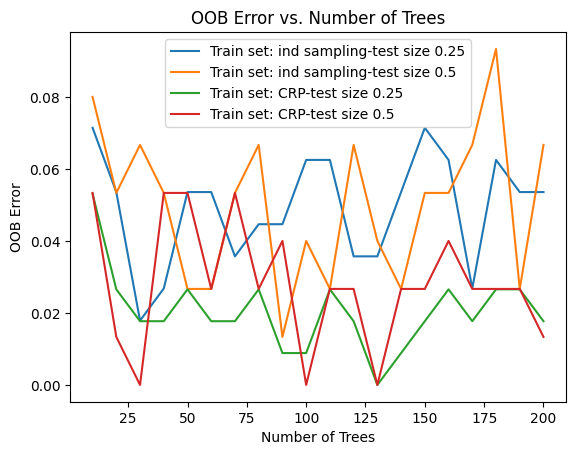

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


def plot_OOB_error(X, y, test_size=0.25, label =''):
    # Create an empty list to store OOB errors
    oob_errors = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Calculate OOB error
        oob_error = 1 - model.oob_score_
        oob_errors.append(oob_error)

    # Plot OOB error
    plt.plot(range(10, 201, 10), oob_errors, label=f"Train set: {label}")

# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')

plot_OOB_error(X, y, test_size=0.25, label="ind sampling-test size 0.25")
plot_OOB_error(X, y, test_size=0.5, label="ind sampling-test size 0.5")
plot_OOB_error(resampled_X, resampled_y, test_size=0.25, label="CRP-test size 0.25")
plot_OOB_error(resampled_X, resampled_y, test_size=0.5, label="CRP-test size 0.5")
plt.legend()


plt.show()

<ipython-input-5-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-5-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-5-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-5-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-5-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

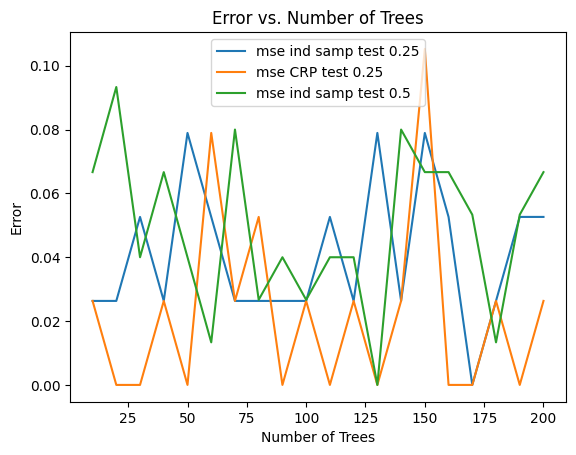

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_metric_error(X, y, test_size=0.25,graph=''):
    mse_values = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Make predictions on the validation set
        val_pred = model.predict(val_X)

        # Calculate MSE and MAE
        mse = mean_squared_error(val_y, val_pred)

        # Append MSE and MAE to the respective lists
        mse_values.append(mse)

    # Plot OOB error
    plt.plot(range(10, 201, 10), mse_values, label="mse"+f'{graph}')
# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Error vs. Number of Trees')

plot_metric_error(X, y, test_size=0.25,graph=' ind samp test 0.25')
plot_metric_error(resampled_X, resampled_y, test_size=0.25,graph=' CRP test 0.25')
plot_metric_error(X, y, test_size=0.5,graph=' ind samp test 0.5')




plt.legend()


plt.show()

<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

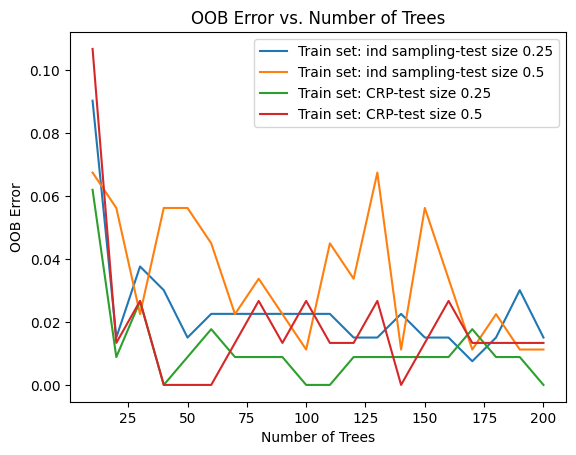

In [6]:
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data)
y = pd.DataFrame(wine.target)

import numpy as np

dataset = X.index
alpha = 0.8

tables = {0:[np.random.choice(dataset)]}
num_sample = 150
for _ in range(num_sample):
    probabilities = []
    
    for table, data_points in tables.items():
        table_size = len(data_points)
        probabilities.append(table_size)
    
    probabilities.append(alpha)
    probabilities = [prob/sum(probabilities) for prob in probabilities]
    
    table_index = np.random.choice(range(len(probabilities)), p=probabilities)
    
    if table_index == len(tables):
        last_table = list(tables.keys())[-1]
        tables[last_table+1] = [np.random.choice(dataset)]
    else:
        tables[table_index].append(np.random.choice(dataset))


import itertools
people = tables.values()
flat_list = list(itertools.chain.from_iterable(people))

resampled_X = X.loc[flat_list]
resampled_y = y.loc[resampled_X.index]


# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')

plot_OOB_error(X, y, test_size=0.25, label="ind sampling-test size 0.25")
plot_OOB_error(X, y, test_size=0.5, label="ind sampling-test size 0.5")
plot_OOB_error(resampled_X, resampled_y, test_size=0.25, label="CRP-test size 0.25")
plot_OOB_error(resampled_X, resampled_y, test_size=0.5, label="CRP-test size 0.5")
plt.legend()


plt.show()

<ipython-input-7-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-7-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-7-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-7-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-7-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

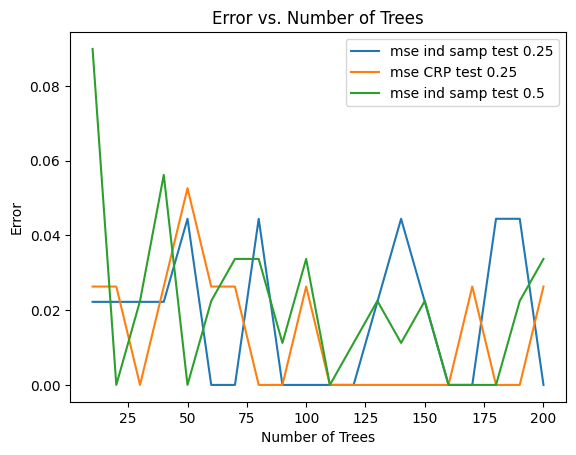

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_metric_error(X, y, test_size=0.25,graph=''):
    mse_values = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Make predictions on the validation set
        val_pred = model.predict(val_X)

        # Calculate MSE and MAE
        mse = mean_squared_error(val_y, val_pred)

        # Append MSE and MAE to the respective lists
        mse_values.append(mse)

    # Plot OOB error
    plt.plot(range(10, 201, 10), mse_values, label="mse"+f'{graph}')
# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Error vs. Number of Trees')

plot_metric_error(X, y, test_size=0.25,graph=' ind samp test 0.25')
plot_metric_error(resampled_X, resampled_y, test_size=0.25,graph=' CRP test 0.25')
plot_metric_error(X, y, test_size=0.5,graph=' ind samp test 0.5')




plt.legend()


plt.show()

<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-4-29c01622bff1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

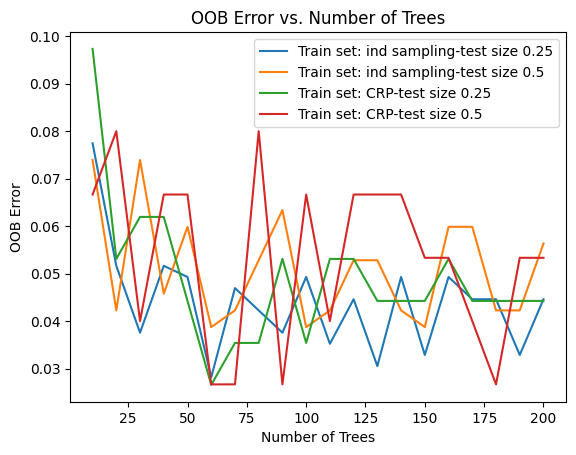

In [8]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data)
y = pd.DataFrame(breast_cancer.target)

import numpy as np

dataset = X.index
alpha = 0.8

tables = {0:[np.random.choice(dataset)]}
num_sample = 150
for _ in range(num_sample):
    probabilities = []
    
    for table, data_points in tables.items():
        table_size = len(data_points)
        probabilities.append(table_size)
    
    probabilities.append(alpha)
    probabilities = [prob/sum(probabilities) for prob in probabilities]
    
    table_index = np.random.choice(range(len(probabilities)), p=probabilities)
    
    if table_index == len(tables):
        last_table = list(tables.keys())[-1]
        tables[last_table+1] = [np.random.choice(dataset)]
    else:
        tables[table_index].append(np.random.choice(dataset))


import itertools
people = tables.values()
flat_list = list(itertools.chain.from_iterable(people))

resampled_X = X.loc[flat_list]
resampled_y = y.loc[resampled_X.index]


# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')

plot_OOB_error(X, y, test_size=0.25, label="ind sampling-test size 0.25")
plot_OOB_error(X, y, test_size=0.5, label="ind sampling-test size 0.5")
plot_OOB_error(resampled_X, resampled_y, test_size=0.25, label="CRP-test size 0.25")
plot_OOB_error(resampled_X, resampled_y, test_size=0.5, label="CRP-test size 0.5")
plt.legend()


plt.show()

<ipython-input-9-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-9-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-9-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)
<ipython-input-9-7857c3ff4d95>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

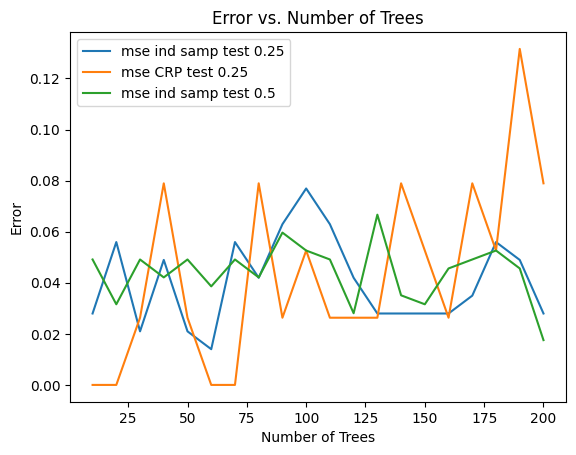

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_metric_error(X, y, test_size=0.25,graph=''):
    mse_values = []

    for n_estimators in range(10, 201, 10):
        # Split the data into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=test_size)

        model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True)
        model.fit(train_X, train_y)

        # Make predictions on the validation set
        val_pred = model.predict(val_X)

        # Calculate MSE and MAE
        mse = mean_squared_error(val_y, val_pred)

        # Append MSE and MAE to the respective lists
        mse_values.append(mse)

    # Plot OOB error
    plt.plot(range(10, 201, 10), mse_values, label="mse"+f'{graph}')
# Call the function and plot all the curves in the same graph
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Error vs. Number of Trees')

plot_metric_error(X, y, test_size=0.25,graph=' ind samp test 0.25')
plot_metric_error(resampled_X, resampled_y, test_size=0.25,graph=' CRP test 0.25')
plot_metric_error(X, y, test_size=0.5,graph=' ind samp test 0.5')




plt.legend()


plt.show()